In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("./Book1_Quan.csv")

In [21]:
B1 = float(input('Nhập học phí: '))
B2 = float(input('Nhập điểm thi: '))
B3 = int(input('Nhập địa điểm (1: miền bắc, 2: miền trung, 3: miền nam): '))
B4 = int(input('Nhập địa điểm (1: Khoa Luật, 2: Khoa Khoa học Tự nhiên, 3: Khoa Khoa học Xã hội, 4: Khoa Khoa Công nghệ, 5: Khoa Nghệ thuật, 6: Khoa Kinh doanh,7: Khoa Kỹ thuật, 8: Khoa Y học): '))
print("Học phí đã nhập:", B1)
print("Điểm thi đã nhập:", B2)
print("Địa điểm đã chọn:", B3)
print("Ngành đã chọn:", B4)

Học phí đã nhập: 21000000.0
Điểm thi đã nhập: 28.0
Địa điểm đã chọn: 2


In [4]:
C_list = []
dia_diem_dict = {'Miền bắc': 1, 'Miền nam': 2, 'Miền trung': 3}

In [5]:
df.head()

,Tên trường,Chuyên ngành,Học phí,Đánh giá,Địa điểm,Điểm dự kiến,Điểm chuẩn năm trước,Chỉ tiêu
0,Đại học ABC,Khoa Kỹ thuật,20000000,1.0,Miền bắc,28.0,27.5,200
1,Đại học XYZ,Khoa Kinh doanh,25000000,1.0,Miền bắc,29.5,28.0,150
2,Đại học LMN,Khoa Nghệ thuật,18000000,0.5,Miền nam,26.0,25.5,180
3,Đại học PQR,Khoa Y học,30000000,1.0,Miền bắc,27.5,27.0,120
4,Đại học UVW,Khoa Khoa học Xã hội,22000000,0.5,Miền nam,25.5,25.0,160


In [6]:
for i in range(len(df)):

    A1 = df['Học phí'][i]
    A2 = df['Đánh giá'][i]
    A3 = dia_diem_dict[df['Địa điểm'][i]]
    A4 = df['Điểm dự kiến'][i]
    A5 = df['Điểm chuẩn năm trước'][i]
    A6 = df['Chỉ tiêu'][i]

    # Sự phù hợp về học phí
    if B1 >= 2 * A1:
        C1 = 1
    elif B1 <= A1:
        C1 = 0
    else:
        C1 = (B1 - A1) / A1

    # Đánh giá trường
    C2 = A2

    # Sự phù hợp về địa điểm
    if abs(A3-B3)==0:
        C3=1
    elif abs(A3-B3)==1:
        C3=0.5
    else:
        C3=0

    # Sự phù hợp về điểm thi
    C4 = (B2 - (A4 - abs(A5 - A4))) / (2 * abs(A5 - A4))
    C4 = max(0, min(1, C4)) # Giới hạn C4 trong khoảng [0, 1]

    # Sự phù hợp về chỉ tiêu
    C5 = A6

    # Tạo một mảng để lưu trữ các giá trị của bảng quyết định
    C = np.array([C1, C2, C3, C4, C5])

    # Thêm mảng vào danh sách
    C_list.append(C)

In [7]:
# Chuyển đổi danh sách thành một ma trận
C_matrix = np.array(C_list)

In [8]:
# Chuẩn hóa ma trận theo cột
C_matrix = C_matrix / np.sqrt(np.sum(C_matrix ** 2, axis=0))

In [9]:
# Giả sử các trọng số của các thuộc tính là như sau
W = np.array([0.2, 0.2, 0.2, 0.2, 0.2]) # Trọng số

In [10]:
# Nhân ma trận với trọng số
C_matrix = C_matrix * W

In [11]:
# Tính phương án tối ưu và phương án tệ nhất
A_opt = np.max(C_matrix, axis=0) # Phương án tối ưu
A_worst = np.min(C_matrix, axis=0) # Phương án tệ nhất

# Tính khoảng cách từ mỗi phương án đến phương án tối ưu và phương án tệ nhất
D_opt = np.sqrt(np.sum((C_matrix - A_opt) ** 2, axis=1)) # Khoảng cách đến phương án tối ưu
D_worst = np.sqrt(np.sum((C_matrix - A_worst) ** 2, axis=1)) # Khoảng cách đến phương án tệ nhất

# Tính độ tương tự với phương án tối ưu và phương án tệ nhất
S = D_worst / (D_opt + D_worst) # Độ tương tự

# Chọn phương án có độ tương tự cao nhất là phương án tốt nhất cho bài toán
best_index = np.argmax(S) # Chỉ số của phần tử lớn nhất trong mảng
print(f"Phương án tốt nhất cho thí sinh là: {best_index}")
print(df.iloc[best_index])

Phương án tốt nhất cho thí sinh là: 10
Tên trường                  Đại học XYZ
Chuyên ngành            Khoa Nghệ thuật
Học phí                        17000000
Đánh giá                            0.5
Địa điểm                       Miền bắc
Điểm dự kiến                       26.5
Điểm chuẩn năm trước               26.0
Chỉ tiêu                            170
Name: 10, dtype: object


In [12]:
worst_index = np.argmin(S)  # Chỉ số của phần tử nhỏ nhất trong mảng
print(f"\nPhương án tệ nhất cho thí sinh là: {worst_index}")
print(df.iloc[worst_index])


Phương án tệ nhất cho thí sinh là: 9
Tên trường                  Đại học UVW
Chuyên ngành            Khoa Kinh doanh
Học phí                        24000000
Đánh giá                            0.5
Địa điểm                       Miền nam
Điểm dự kiến                       29.0
Điểm chuẩn năm trước               28.3
Chỉ tiêu                            150
Name: 9, dtype: object


In [13]:
# Sắp xếp độ tương tự giảm dần và lấy ra 5 phần tử đầu tiên
top_5_indices = np.argsort(S)[::-1][:5]

# In ra mức rank 5 phương án tốt nhất
print("Top 5 phương án tốt nhất:")
for i, index in enumerate(top_5_indices, start=1):
    print(f"Rank {i}: Phương án {index}")
    print(df.iloc[index])
    print("\n")


Top 5 phương án tốt nhất:
Rank 1: Phương án 24
Tên trường                  Đại học OPQ
Chuyên ngành            Khoa Nghệ thuật
Học phí                        17000000
Đánh giá                            0.5
Địa điểm                       Miền bắc
Điểm dự kiến                       26.3
Điểm chuẩn năm trước               25.9
Chỉ tiêu                            170
Name: 24, dtype: object


Rank 2: Phương án 10
Tên trường                  Đại học XYZ
Chuyên ngành            Khoa Nghệ thuật
Học phí                        17000000
Đánh giá                            0.5
Địa điểm                       Miền bắc
Điểm dự kiến                       26.5
Điểm chuẩn năm trước               26.0
Chỉ tiêu                            170
Name: 10, dtype: object


Rank 3: Phương án 2
Tên trường                  Đại học LMN
Chuyên ngành            Khoa Nghệ thuật
Học phí                        18000000
Đánh giá                            0.5
Địa điểm                       Miền nam
Điểm dự kiến        

In [14]:
# Sắp xếp độ tương tự giảm dần và lấy ra 5 phần tử đầu tiên
top_5_indices = np.argsort(S)[::-1][:5]

# Tạo DataFrame cho top 5 phương án tốt nhất
top_5_df = df.iloc[top_5_indices]

# In ra mức rank 5 phương án tốt nhất dưới dạng bảng
print("Top 5 phương án tốt nhất:")
print(top_5_df)

Top 5 phương án tốt nhất:
     Tên trường          Chuyên ngành   Học phí  Đánh giá    Địa điểm  \
24  Đại học OPQ       Khoa Nghệ thuật  17000000       0.5    Miền bắc   
10  Đại học XYZ       Khoa Nghệ thuật  17000000       0.5    Miền bắc   
2   Đại học LMN       Khoa Nghệ thuật  18000000       0.5    Miền nam   
34  Đại học PQR  Khoa Khoa học Xã hội  18500000       0.5    Miền nam   
22  Đại học LMN         Khoa Kỹ thuật  18000000       1.0  Miền trung   

    Điểm dự kiến  Điểm chuẩn năm trước  Chỉ tiêu  
24          26.3                  25.9       170  
10          26.5                  26.0       170  
2           26.0                  25.5       180  
34          26.4                  25.9       170  
22          27.9                  27.4       190  


In [15]:
# Sắp xếp độ tương tự tăng dần và lấy ra 5 phần tử đầu tiên
bottom_5_indices = np.argsort(S)[:5]

# Tạo DataFrame cho bottom 5 phương án tệ nhất
bottom_5_df = df.iloc[bottom_5_indices]

# In ra mức rank 5 phương án tệ nhất dưới dạng bảng
print("Top 5 phương án tệ nhất:")
print(bottom_5_df)

Top 5 phương án tệ nhất:
     Tên trường     Chuyên ngành   Học phí  Đánh giá    Địa điểm  \
9   Đại học UVW  Khoa Kinh doanh  24000000       0.5    Miền nam   
18  Đại học UVW       Khoa Y học  33000000       1.0  Miền trung   
11  Đại học HIJ       Khoa Y học  29000000       1.0  Miền trung   
41  Đại học HIJ  Khoa Kinh doanh  20500000       1.0  Miền trung   
27  Đại học GHI       Khoa Y học  28000000       1.0  Miền trung   

    Điểm dự kiến  Điểm chuẩn năm trước  Chỉ tiêu  
9           29.0                  28.3       150  
18          27.7                  27.3       110  
11          28.7                  28.1       110  
41          27.5                  27.0       120  
27          29.0                  28.5       140  


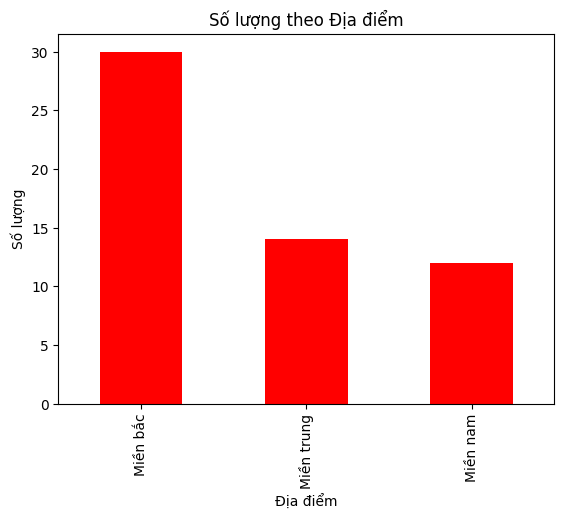

In [16]:
import matplotlib.pyplot as plt

# Biểu đồ cột cho cột 'Địa điểm'
df['Địa điểm'].value_counts().plot(kind='bar', color='red', linestyle='--')

# Thiết lập tiêu đề và các nhãn
plt.title('Số lượng theo Địa điểm')
plt.xlabel('Địa điểm')
plt.ylabel('Số lượng')

# Hiển thị biểu đồ
plt.show()


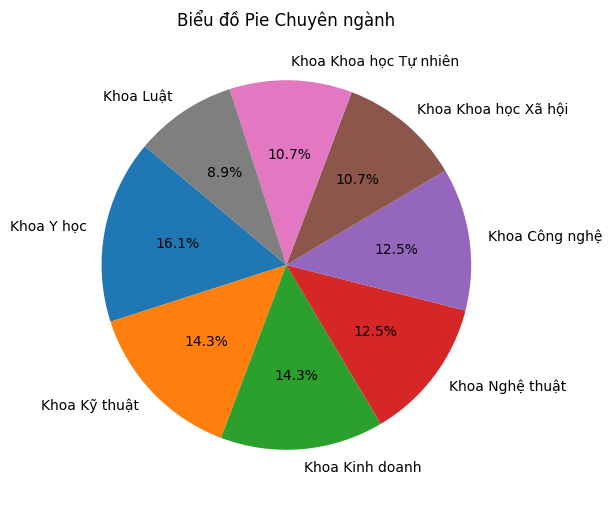

In [17]:
import matplotlib.pyplot as plt
# Tạo biểu đồ pie cho cột 'Chuyên ngành'
chuyen_nganh_counts = df['Chuyên ngành'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(chuyen_nganh_counts, labels=chuyen_nganh_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Biểu đồ Pie Chuyên ngành')
plt.show()

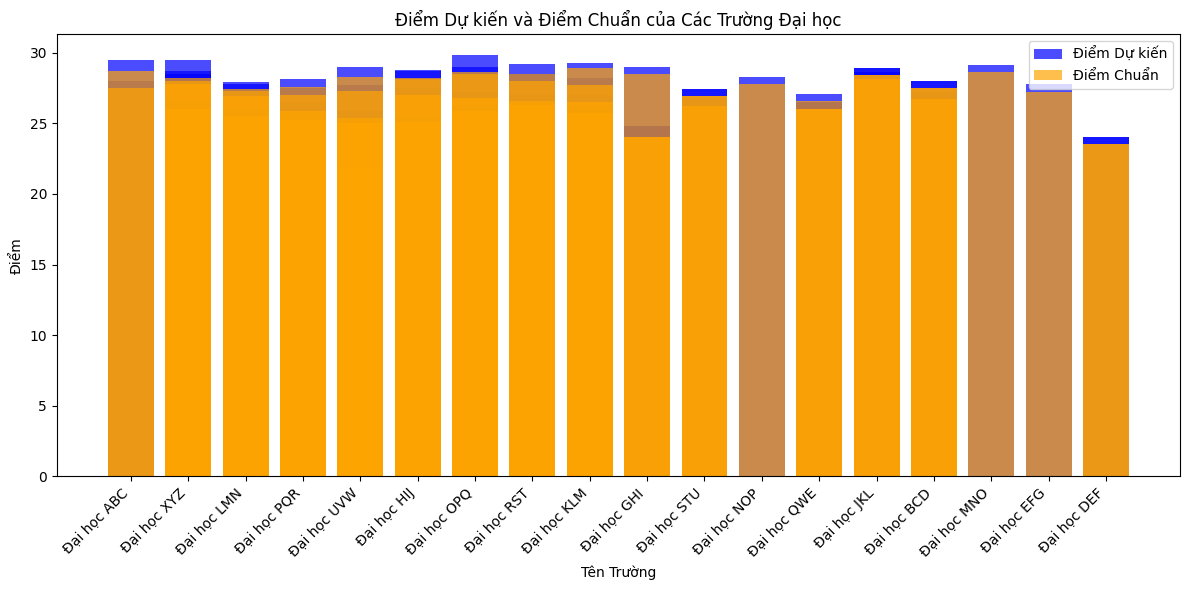

In [18]:
import matplotlib.pyplot as plt

# Lấy tên trường làm nhãn cho trục x
labels = df['Tên trường']

# Lấy điểm dự kiến và điểm chuẩn
diem_du_kien = df['Điểm dự kiến']
diem_chuan = df['Điểm chuẩn năm trước']

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
plt.bar(labels, diem_du_kien, label='Điểm Dự kiến', color='blue', alpha=0.7)
plt.bar(labels, diem_chuan, label='Điểm Chuẩn', color='orange', alpha=0.7)

# Đặt các nhãn và tiêu đề
plt.xlabel('Tên Trường')
plt.ylabel('Điểm')
plt.title('Điểm Dự kiến và Điểm Chuẩn của Các Trường Đại học')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


float64
float64


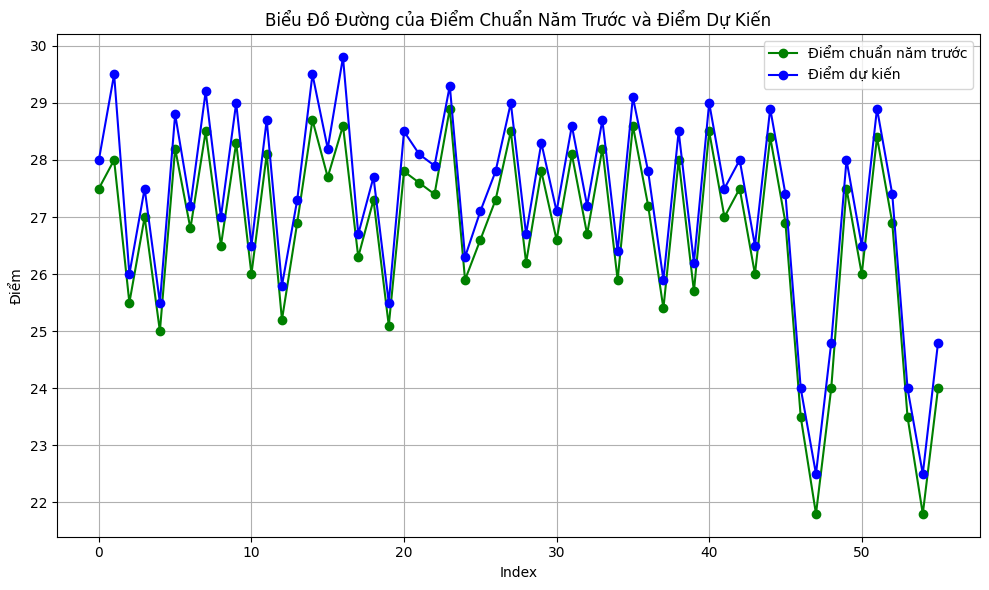

In [19]:
import matplotlib.pyplot as plt

# Kiểm tra kiểu dữ liệu của cột "Điểm dự kiến"
print(df['Điểm dự kiến'].dtype)

# Nếu kiểu dữ liệu không phải là chuỗi, chuyển về chuỗi trước khi xử lý
df['Điểm dự kiến'] = df['Điểm dự kiến'].astype(str).str.replace(',', '').astype(float)

# Kiểm tra lại kiểu dữ liệu
print(df['Điểm dự kiến'].dtype)

# Lấy cột Điểm chuẩn năm trước và Điểm dự kiến
diem_chuan_nam_truoc = df['Điểm chuẩn năm trước']
diem_du_kien = df['Điểm dự kiến']

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
plt.plot(diem_chuan_nam_truoc, marker='o', linestyle='-', color='green', label='Điểm chuẩn năm trước')
plt.plot(diem_du_kien, marker='o', linestyle='-', color='blue', label='Điểm dự kiến')

# Đặt các nhãn và tiêu đề
plt.xlabel('Index')
plt.ylabel('Điểm')
plt.title('Biểu Đồ Đường của Điểm Chuẩn Năm Trước và Điểm Dự Kiến')

# Hiển thị chú thích (legend)
plt.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.grid(True)
plt.show()


<Axes: >

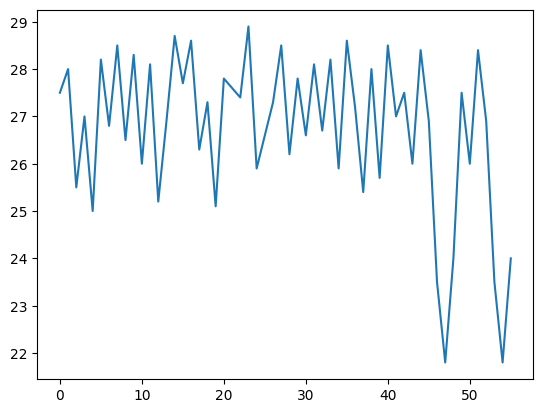

In [20]:
df['Điểm chuẩn năm trước'].plot.line()